In [ ]:
!pip install -q -U transformers==4.37.2
!pip install -q bitsandbytes==0.41.3 accelerate==0.25.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 36.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.6/92.6 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 15.7 MB/s eta 0:00:00


In [ ]:
import torch
from transformers import BitsAndBytesConfig

quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16
)

In [ ]:
from transformers import pipeline

model_id = "llava-hf/llava-1.5-13b-hf"

pipe = pipeline("image-to-text", model=model_id, model_kwargs={"quantization_config": quantization_config})

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.10k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/77.2k [00:00<?, ?B/s]

model-00001-of-00006.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00002-of-00006.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00003-of-00006.safetensors:   0%|          | 0.00/4.88G [00:00<?, ?B/s]

model-00004-of-00006.safetensors:   0%|          | 0.00/4.93G [00:00<?, ?B/s]

model-00005-of-00006.safetensors:   0%|          | 0.00/4.93G [00:00<?, ?B/s]

model-00006-of-00006.safetensors:   0%|          | 0.00/2.02G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/6 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.36k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/41.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


preprocessor_config.json:   0%|          | 0.00/505 [00:00<?, ?B/s]

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Test Image For Demo:

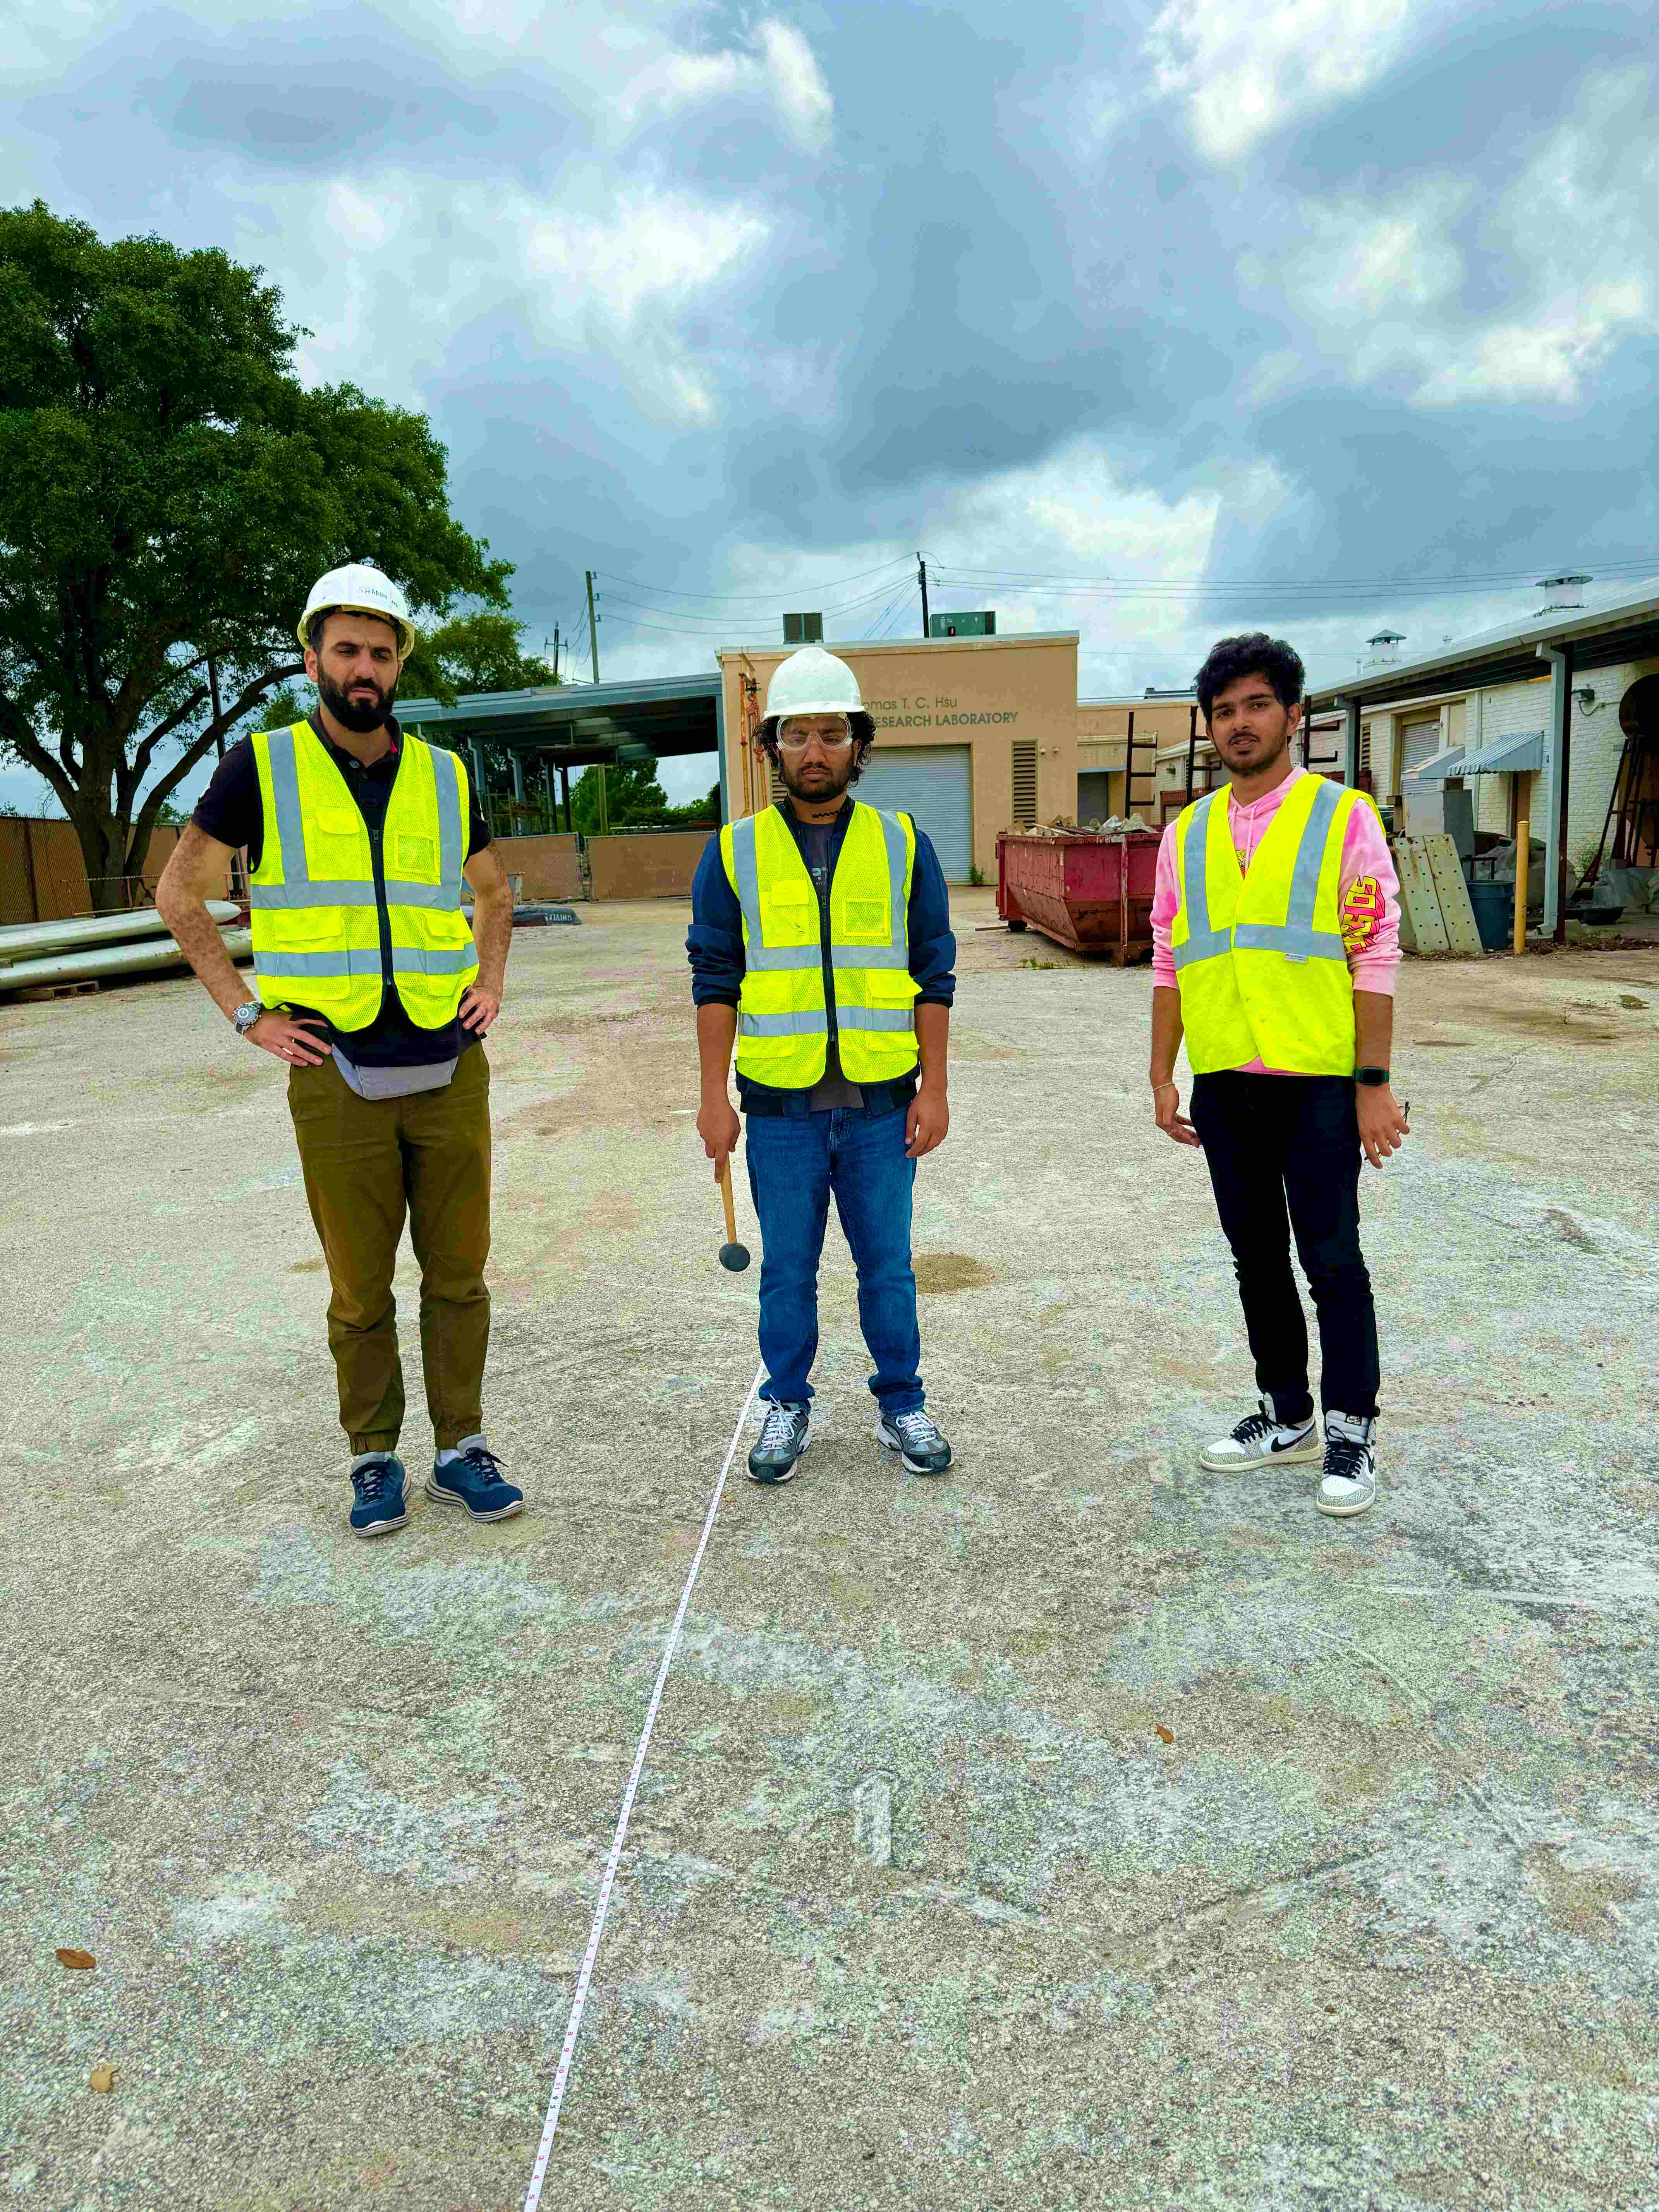

In [37]:
from PIL import Image

image_path = "//content/drive/MyDrive/Research_work_prathyush/IMG_1071 (3).jpg"  # Replace with the path to your image
image = Image.open(image_path)

prompts = [
    "USER: <image>\nWho is not wearing the helmet and specify his shirt colour?\nASSISTANT:",
    "USER: <image>\nIs everyone wearing a safety vest?\nASSISTANT:",
    "USER: <image>\nSuggest some precautions by seeing the image?\nASSISTANT:",
    "USER: <image>\nHow many people are there in the image?\nASSISTANT:"
]

# Generate predictions for each question
for prompt in prompts:
    outputs = pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens": 200})
    generated_text = outputs[0]["generated_text"]

    # Remove the duplicated part of the prompt from the output
    response = generated_text.split("ASSISTANT:")[-1].strip()

    print(f"{prompt} {response}\n")


/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1123: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


USER: <image>
Who is not wearing the helmet and specify his shirt colour?
ASSISTANT: The man who is not wearing a helmet is wearing a pink shirt.

USER: <image>
Is everyone wearing a safety vest?
ASSISTANT: Yes, all three men are wearing safety vests.

USER: <image>
Suggest some precautions by seeing the image?
ASSISTANT: In the image, three men are standing in a construction area, wearing safety vests and hard hats. They are posing for a picture, which suggests that they are working on a construction project. Some precautions that can be inferred from the image include:

1. Wearing appropriate safety gear, such as hard hats and safety vests, to protect themselves from potential hazards and injuries.
2. Ensuring that the construction area is well-organized and free from clutter, as the men are standing in a clear space.
3. Following proper communication and teamwork among the workers to ensure the project runs smoothly and safely.
4. Adhering to any safety protocols or guidelines set b

In [ ]:
from PIL import Image, ImageDraw
import os
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

#folders
folder_path_images = '/content/drive/MyDrive/augumented_q-1_images/images'
folder_path_annotations = '/content/drive/MyDrive/augumented_q-1_images/annotations'

# List all image files
image_paths = [os.path.join(folder_path_images, f) for f in os.listdir(folder_path_images) if f.endswith('.jpg')]

questions = [
    "Question 1: <image> Is he wearing hard hat? \nASSISTANT:"
    "Question 2: <image> Is he wearing safety Helmet? \nASSISTANT:"
    "Question 3: <image> Is he wearing safety Glasses? \nASSISTANT:"

]

predictions = []
ground_truths = []
files = []

# Processing each image and extracting predictions
for image_path in image_paths:
    image = Image.open(image_path)
    draw = ImageDraw.Draw(image)

    # Corresponding annotation file
    base_filename = os.path.splitext(os.path.basename(image_path))[0]
    annotation_file = f"{folder_path_annotations}/{base_filename}.txt"

    #the ground truth annotation
    with open(annotation_file, 'r') as file:
        ground_truth = file.read().strip().lower()
        ground_truths.append(ground_truth)
        files.append(base_filename)  # Storing the base filename for tracing

    for question in questions:
        outputs = pipe(image, prompt=question, generate_kwargs={"max_new_tokens": 200})
        generated_text = outputs[0]["generated_text"]
        assistant_response = generated_text.split("\nASSISTANT:")[1].strip()

        first_word = assistant_response.split()[0].replace(',', '').lower() if assistant_response else "no response"
        predictions.append(first_word)


        print(f"Image Path: {image_path}")
        print(f"Prediction: {first_word}")
        print(f"Ground Truth: {ground_truth}")

# Calculating the metrics
accuracy = accuracy_score(ground_truths, predictions)
precision = precision_score(ground_truths, predictions, pos_label='yes')
recall = recall_score(ground_truths, predictions, pos_label='yes')
f1 = f1_score(ground_truths, predictions, pos_label='yes')

# Display aggregated metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")